In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn import model_selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #from google.colab import drive
 #drive.mount('/content/drive')

In [ ]:
data=pd.read_csv('/content/inshort_news_data-7 (1).csv')

In [ ]:
data

,Unnamed: 0,news_headline,news_article,news_category
0,0,47% find WhatsApp's updated privacy policy una...,After the recent update to WhatsApp's privacy ...,technology
1,1,As promised: Elon Musk on Tesla's India entry,"Elon Musk has tweeted ""as promised"" in respons...",technology
2,2,Xiaomi blacklisted by US for its links to Chin...,The US has blacklisted smartphone manufacturer...,technology
3,3,Google removes personal loan apps that violate...,Google on Thursday said it has removed persona...,technology
4,4,"Intel CEO Bob Swan to step down in Feb, VMware...",Intel CEO Bob Swan is set to step down from hi...,technology
...,...,...,...,...
1737,1737,2 IAF doctors to soon leave for Russia to trai...,Two Indian Air Force doctors who have speciali...,science
1738,1738,NASA finds FM signal coming from Jupiter's moo...,NASA's Juno space probe has discovered an FM s...,science
1739,1739,New state of matter 'liquid glass' discovered:...,University of Konstanz's researchers have unco...,science
1740,1740,Astrophysicist Shashikumar Madhusudan Chitre p...,Renowned astrophysicist Professor Shashikumar ...,science


In [ ]:
data.head(10)

,Unnamed: 0,news_headline,news_article,news_category
0,0,47% find WhatsApp's updated privacy policy una...,After the recent update to WhatsApp's privacy ...,technology
1,1,As promised: Elon Musk on Tesla's India entry,"Elon Musk has tweeted ""as promised"" in respons...",technology
2,2,Xiaomi blacklisted by US for its links to Chin...,The US has blacklisted smartphone manufacturer...,technology
3,3,Google removes personal loan apps that violate...,Google on Thursday said it has removed persona...,technology
4,4,"Intel CEO Bob Swan to step down in Feb, VMware...",Intel CEO Bob Swan is set to step down from hi...,technology
5,5,Samsung uses iPhone to tweet about its upcomin...,Samsung used its rival company Apple's iPhone ...,technology
6,6,TikTok to make accounts private by default for...,TikTok users aged under 16 will have their acc...,technology
7,7,Trump ban was right but it's a failure that se...,Twitter CEO Jack Dorsey on Thursday said that ...,technology
8,8,Army officer develops 'microcopter' for tracki...,An Indian Army officer has indigenously develo...,technology
9,9,"Health, tech firms including Microsoft, Oracle...","The Vaccination Credential Initiative (VIC), a...",technology


In [ ]:
data.tail()

,Unnamed: 0,news_headline,news_article,news_category
1737,1737,2 IAF doctors to soon leave for Russia to trai...,Two Indian Air Force doctors who have speciali...,science
1738,1738,NASA finds FM signal coming from Jupiter's moo...,NASA's Juno space probe has discovered an FM s...,science
1739,1739,New state of matter 'liquid glass' discovered:...,University of Konstanz's researchers have unco...,science
1740,1740,Astrophysicist Shashikumar Madhusudan Chitre p...,Renowned astrophysicist Professor Shashikumar ...,science
1741,1741,Scientists discover 2 dwarf giraffes in Namibi...,Scientists have found two dwarf giraffes in Na...,science


In [ ]:
data.dtypes

Unnamed: 0        int64
news_headline    object
news_article     object
news_category    object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1742 non-null   int64 
 1   news_headline  1742 non-null   object
 2   news_article   1742 non-null   object
 3   news_category  1742 non-null   object
dtypes: int64(1), object(3)
memory usage: 54.6+ KB


In [ ]:
data.shape

(1742, 4)

In [ ]:
data.describe()

,Unnamed: 0
count,1742.000000
mean,870.500000
std,503.016401
min,0.000000
25%,435.250000
50%,870.500000
75%,1305.750000
max,1741.000000


# **iloc**

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
data.iloc[0]

Unnamed: 0                                                       0
news_headline    47% find WhatsApp's updated privacy policy una...
news_article     After the recent update to WhatsApp's privacy ...
news_category                                           technology
Name: 0, dtype: object

In [ ]:
data.iloc[-1]

Unnamed: 0                                                    1741
news_headline    Scientists discover 2 dwarf giraffes in Namibi...
news_article     Scientists have found two dwarf giraffes in Na...
news_category                                              science
Name: 1741, dtype: object

In [ ]:
data.iloc[:,0]

0          0
1          1
2          2
3          3
4          4
        ... 
1737    1737
1738    1738
1739    1739
1740    1740
1741    1741
Name: Unnamed: 0, Length: 1742, dtype: int64

In [ ]:
data.iloc[0,3]

'technology'

In [ ]:
data.iloc[0:10,0:2]

,Unnamed: 0,news_headline
0,0,47% find WhatsApp's updated privacy policy una...
1,1,As promised: Elon Musk on Tesla's India entry
2,2,Xiaomi blacklisted by US for its links to Chin...
3,3,Google removes personal loan apps that violate...
4,4,"Intel CEO Bob Swan to step down in Feb, VMware..."
5,5,Samsung uses iPhone to tweet about its upcomin...
6,6,TikTok to make accounts private by default for...
7,7,Trump ban was right but it's a failure that se...
8,8,Army officer develops 'microcopter' for tracki...
9,9,"Health, tech firms including Microsoft, Oracle..."


In [ ]:
data.iloc[[0,5,10],[0,1,2]]

,Unnamed: 0,news_headline,news_article
0,0,47% find WhatsApp's updated privacy policy una...,After the recent update to WhatsApp's privacy ...
5,5,Samsung uses iPhone to tweet about its upcomin...,Samsung used its rival company Apple's iPhone ...
10,10,Aakash Educational confirms it is in talks wit...,Aakash Educational Services has confirmed it i...


# **loc**

In [ ]:
data.loc[data['news_category']=='science']

,Unnamed: 0,news_headline,news_article,news_category
149,149,New species of 'orange and black' bat discover...,A new species of orange and black bat from the...,science
150,150,Astronomers capture a distant galaxy 'die' for...,Astronomers have captured for the first time a...,science
151,151,What is the Candida auris outbreak that was re...,Candida auris is an emerging fungus that is of...,science
152,152,'Magic' mushrooms grow in US man's blood after...,A 30-year-old US man was hospitalised with org...,science
153,153,Yellow mealworms become first insect approved ...,Yellow mealworms have become the first insect ...,science
...,...,...,...,...
1737,1737,2 IAF doctors to soon leave for Russia to trai...,Two Indian Air Force doctors who have speciali...,science
1738,1738,NASA finds FM signal coming from Jupiter's moo...,NASA's Juno space probe has discovered an FM s...,science
1739,1739,New state of matter 'liquid glass' discovered:...,University of Konstanz's researchers have unco...,science
1740,1740,Astrophysicist Shashikumar Madhusudan Chitre p...,Renowned astrophysicist Professor Shashikumar ...,science


In [ ]:
#data.set_index("news_category",inplace=True)

In [ ]:
data.loc[data["news_category"] =='science','news_headline':'news_article']

,news_headline,news_article
149,New species of 'orange and black' bat discover...,A new species of orange and black bat from the...
150,Astronomers capture a distant galaxy 'die' for...,Astronomers have captured for the first time a...
151,What is the Candida auris outbreak that was re...,Candida auris is an emerging fungus that is of...
152,'Magic' mushrooms grow in US man's blood after...,A 30-year-old US man was hospitalised with org...
153,Yellow mealworms become first insect approved ...,Yellow mealworms have become the first insect ...
...,...,...
1737,2 IAF doctors to soon leave for Russia to trai...,Two Indian Air Force doctors who have speciali...
1738,NASA finds FM signal coming from Jupiter's moo...,NASA's Juno space probe has discovered an FM s...
1739,New state of matter 'liquid glass' discovered:...,University of Konstanz's researchers have unco...
1740,Astrophysicist Shashikumar Madhusudan Chitre p...,Renowned astrophysicist Professor Shashikumar ...


In [ ]:
data.loc[data['news_category'].str.endswith("logy")]

,Unnamed: 0,news_headline,news_article,news_category
0,0,47% find WhatsApp's updated privacy policy una...,After the recent update to WhatsApp's privacy ...,technology
1,1,As promised: Elon Musk on Tesla's India entry,"Elon Musk has tweeted ""as promised"" in respons...",technology
2,2,Xiaomi blacklisted by US for its links to Chin...,The US has blacklisted smartphone manufacturer...,technology
3,3,Google removes personal loan apps that violate...,Google on Thursday said it has removed persona...,technology
4,4,"Intel CEO Bob Swan to step down in Feb, VMware...",Intel CEO Bob Swan is set to step down from hi...,technology
...,...,...,...,...
1587,1587,Tesla in talks to set up manufacturing facilit...,Tesla is in talks with the Gujarat government ...,technology
1588,1588,SpaceX delivers 60 satellites setting new rock...,Elon Musk-led SpaceX on Wednesday successfully...,technology
1589,1589,Android 12 to let users share WiFi passwords w...,Google is reportedly working on a feature for ...,technology
1590,1590,SpaceX buys 2 offshore oil rigs to turn into f...,Elon Musk-led SpaceX has purchased two former ...,technology


In [ ]:
data.loc[data['news_category'].isin(['technology','science'])]

,Unnamed: 0,news_headline,news_article,news_category
0,0,47% find WhatsApp's updated privacy policy una...,After the recent update to WhatsApp's privacy ...,technology
1,1,As promised: Elon Musk on Tesla's India entry,"Elon Musk has tweeted ""as promised"" in respons...",technology
2,2,Xiaomi blacklisted by US for its links to Chin...,The US has blacklisted smartphone manufacturer...,technology
3,3,Google removes personal loan apps that violate...,Google on Thursday said it has removed persona...,technology
4,4,"Intel CEO Bob Swan to step down in Feb, VMware...",Intel CEO Bob Swan is set to step down from hi...,technology
...,...,...,...,...
1737,1737,2 IAF doctors to soon leave for Russia to trai...,Two Indian Air Force doctors who have speciali...,science
1738,1738,NASA finds FM signal coming from Jupiter's moo...,NASA's Juno space probe has discovered an FM s...,science
1739,1739,New state of matter 'liquid glass' discovered:...,University of Konstanz's researchers have unco...,science
1740,1740,Astrophysicist Shashikumar Madhusudan Chitre p...,Renowned astrophysicist Professor Shashikumar ...,science


In [ ]:
data['news_headline'].nunique()

854

In [ ]:
data['news_headline'].unique()

array(["47% find WhatsApp's updated privacy policy unacceptable: Inshorts poll",
       "As promised: Elon Musk on Tesla's India entry",
       'Xiaomi blacklisted by US for its links to Chinese military',
       'Google removes personal loan apps that violated safety policies in India',
       'Intel CEO Bob Swan to step down in Feb, VMware CEO to replace him: Report',
       'Samsung uses iPhone to tweet about its upcoming smartphone; gets trolled',
       'TikTok to make accounts private by default for users aged under 16',
       "Trump ban was right but it's a failure that sets dangerous precedent: Twitter CEO",
       "Army officer develops 'microcopter' for tracking terrorists inside buildings",
       "Health, tech firms including Microsoft, Oracle to create 'vaccination passports'",
       "Aakash Educational confirms it is in talks with BYJU'S for reported $1 bn deal",
       'Dropbox to cut 11% of its global workforce, COO to step down',
       "Funny business being done usi

# NULL VALUES**

In [ ]:
data.isnull()

,Unnamed: 0,news_headline,news_article,news_category
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1737,False,False,False,False
1738,False,False,False,False
1739,False,False,False,False
1740,False,False,False,False


In [ ]:
data.isnull().sum()

Unnamed: 0       0
news_headline    0
news_article     0
news_category    0
dtype: int64

# MISSING **VALUES**

In [ ]:
missingvalues=["--","na",'n/a']
data=pd.read_csv('/content/inshort_news_data-7 (1).csv',na_values=missingvalues)
data

,Unnamed: 0,news_headline,news_article,news_category
0,0,47% find WhatsApp's updated privacy policy una...,After the recent update to WhatsApp's privacy ...,technology
1,1,As promised: Elon Musk on Tesla's India entry,"Elon Musk has tweeted ""as promised"" in respons...",technology
2,2,Xiaomi blacklisted by US for its links to Chin...,The US has blacklisted smartphone manufacturer...,technology
3,3,Google removes personal loan apps that violate...,Google on Thursday said it has removed persona...,technology
4,4,"Intel CEO Bob Swan to step down in Feb, VMware...",Intel CEO Bob Swan is set to step down from hi...,technology
...,...,...,...,...
1737,1737,2 IAF doctors to soon leave for Russia to trai...,Two Indian Air Force doctors who have speciali...,science
1738,1738,NASA finds FM signal coming from Jupiter's moo...,NASA's Juno space probe has discovered an FM s...,science
1739,1739,New state of matter 'liquid glass' discovered:...,University of Konstanz's researchers have unco...,science
1740,1740,Astrophysicist Shashikumar Madhusudan Chitre p...,Renowned astrophysicist Professor Shashikumar ...,science


#VISUALIZATION

In [ ]:
dataset = data['news_category'].value_counts()
sample = data['news_category'].unique()
dataset

sports           250
science          250
politics         250
automobile       250
entertainment    249
world            249
technology       244
Name: news_category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


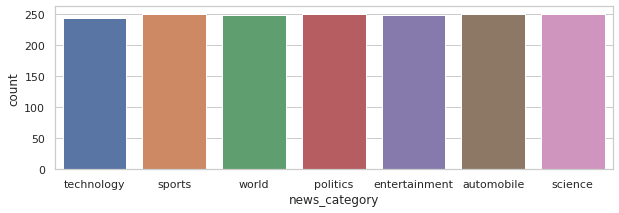

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(data.news_category)


The above plot shows all the categories with the number of articles under each one of them.


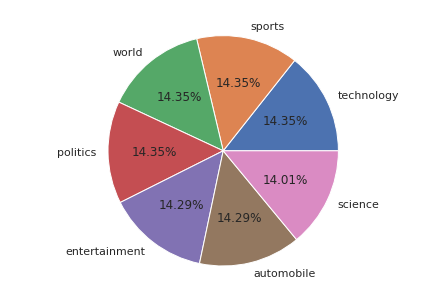

In [ ]:
fig = plt.figure()
graph = fig.add_axes([1,1,1,1])
graph.axis('equal')
graph.pie(dataset, labels = sample, autopct='%1.2f%%')
plt.show()

The above is the distribution of the number of categories and their headlines shown in a pie chart.

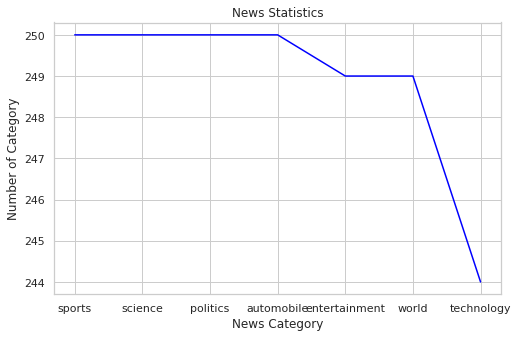

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(dataset, color = 'blue')
plt.xlabel("News Category")
plt.ylabel("Number of Category")
plt.title("News Statistics")
plt.show()

This line plot shows the decrement in the number of occurances of the categories in the dataset.

In [ ]:
label_encode = LabelEncoder()
new = label_encode.fit_transform(data.news_category)
data['category'] = new
data.head()

,Unnamed: 0,news_headline,news_article,news_category,category
0,0,47% find WhatsApp's updated privacy policy una...,After the recent update to WhatsApp's privacy ...,technology,5
1,1,As promised: Elon Musk on Tesla's India entry,"Elon Musk has tweeted ""as promised"" in respons...",technology,5
2,2,Xiaomi blacklisted by US for its links to Chin...,The US has blacklisted smartphone manufacturer...,technology,5
3,3,Google removes personal loan apps that violate...,Google on Thursday said it has removed persona...,technology,5
4,4,"Intel CEO Bob Swan to step down in Feb, VMware...",Intel CEO Bob Swan is set to step down from hi...,technology,5


In [ ]:
data.groupby(["news_category", "category"]).count()

,,Unnamed: 0,news_headline,news_article
news_category,category,,,
automobile,0,250,250,250
entertainment,1,249,249,249
politics,2,250,250,250
science,3,250,250,250
sports,4,250,250,250
technology,5,244,244,244
world,6,249,249,249


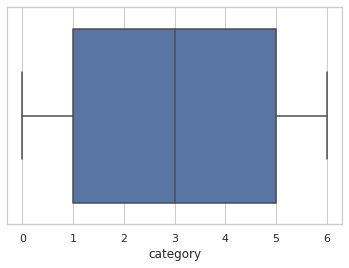

In [ ]:
sns.boxplot(x="category",data=data)

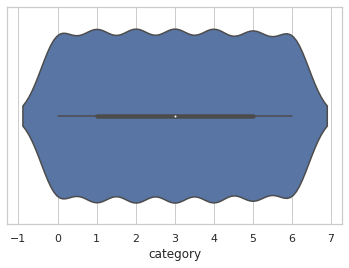

In [ ]:
sns.violinplot(x="category",data=data)

In [ ]:
def create_wordcloud(words):
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
  plt.figure(figsize=(10, 7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()

In [ ]:
nameCategory = []
noCategory = []

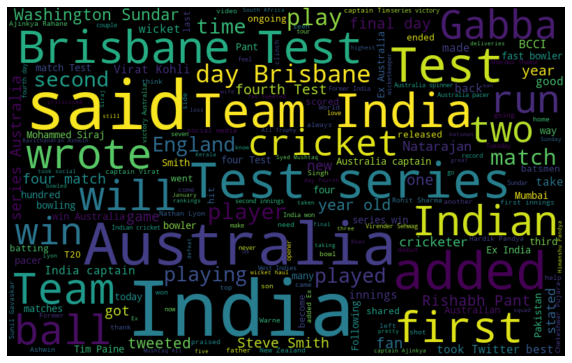

In [ ]:
subset=data[data.news_category=="sports"]
text=subset.news_article.values
words =" ".join(text)
create_wordcloud(words)

In [ ]:
nameCategory.append('sports')
noCategory.append(int(len(words)))

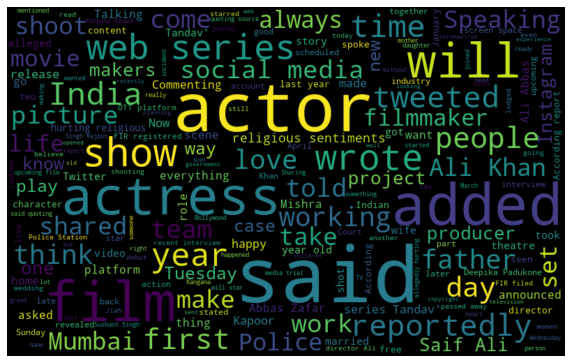

In [ ]:
subset=data[data.news_category=="entertainment"]
text=subset.news_article.values
words =" ".join(text)
create_wordcloud(words)

In [ ]:
nameCategory.append('entertainment')
noCategory.append(int(len(words)))

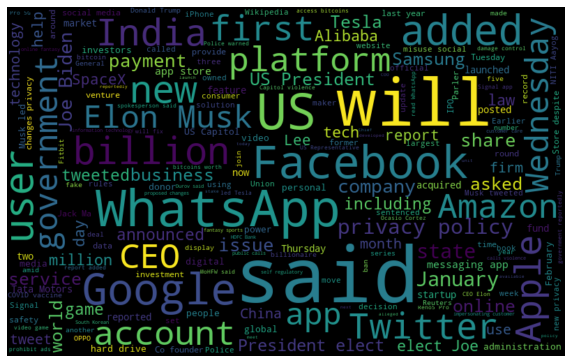

In [ ]:
subset=data[data.news_category=="technology"]
text=subset.news_article.values
words =" ".join(text)
create_wordcloud(words)

In [ ]:
nameCategory.append('technology')
noCategory.append(int(len(words)))

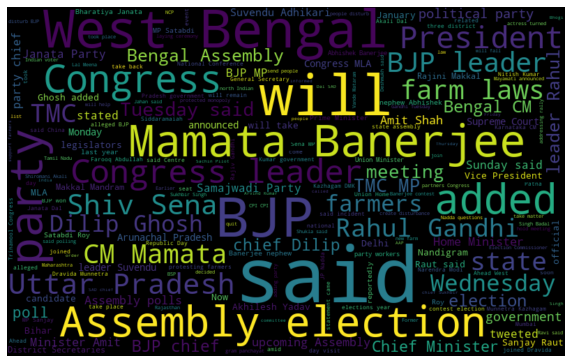

In [ ]:
subset=data[data.news_category=="politics"]
text=subset.news_article.values
words =" ".join(text)
create_wordcloud(words)

In [ ]:
nameCategory.append('politics')
noCategory.append(int(len(words)))

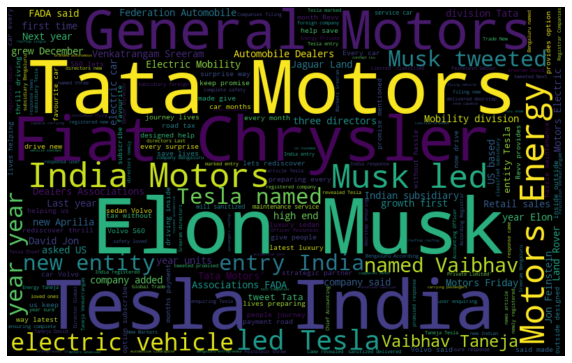

In [ ]:
subset=data[data.news_category=="automobile"]
text=subset.news_article.values
words =" ".join(text)
create_wordcloud(words)

In [ ]:
nameCategory.append('automobile')
noCategory.append(int(len(words)))

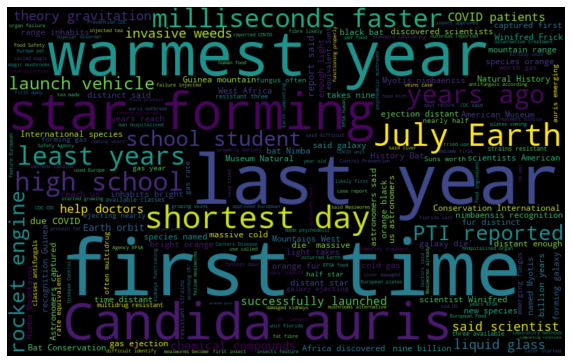

In [ ]:
subset=data[data.news_category=="science"]
text=subset.news_article.values
words =" ".join(text)
create_wordcloud(words)

In [ ]:
nameCategory.append('science')
noCategory.append(int(len(words)))

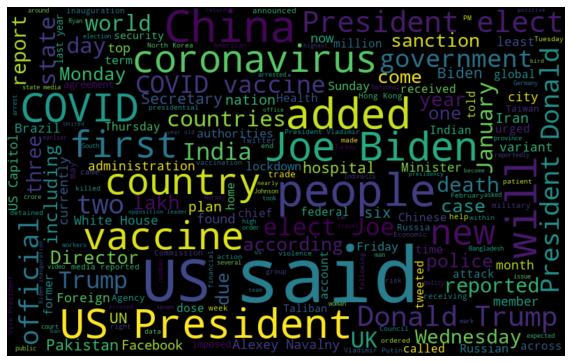

In [ ]:
subset=data[data.news_category=="world"]
text=subset.news_article.values
words =" ".join(text)
create_wordcloud(words)

In [ ]:
nameCategory.append('world')
noCategory.append(int(len(words)))

In [ ]:
data['news_length'] = data['news_article'].str.len()
print(data['news_length'])

0       380
1       338
2       382
3       374
4       364
       ... 
1737    365
1738    351
1739    396
1740    364
1741    350
Name: news_length, Length: 1742, dtype: int64


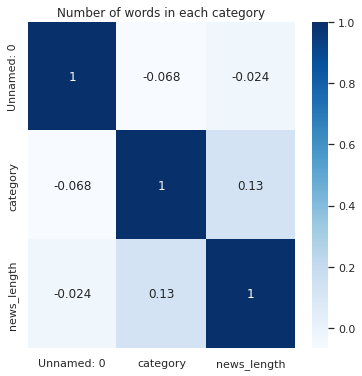

In [ ]:
plt.figure(figsize = (6, 6))
ax = sns.heatmap(data.corr(), cmap="Blues", annot=True);
ax.set_title('Number of words in each category');

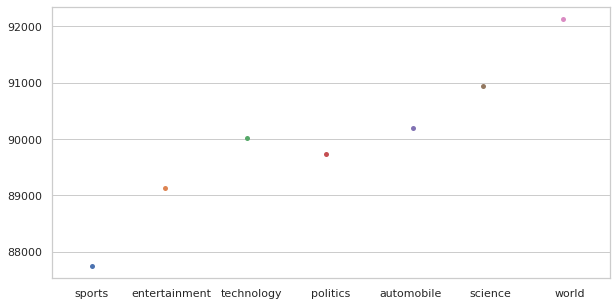

In [ ]:

plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x=nameCategory, y=noCategory)


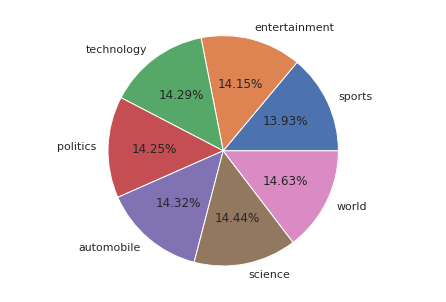

In [ ]:
fig = plt.figure()
graph = fig.add_axes([1,1,1,1])
graph.axis('equal')
graph.pie(noCategory, labels = nameCategory, autopct='%1.2f%%')
plt.show()

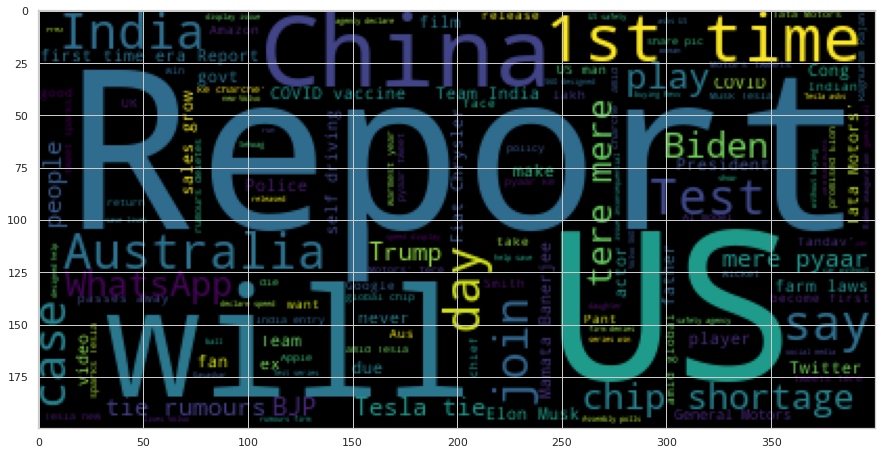

In [ ]:
sentences = data['news_headline'].tolist()
len(sentences)
sentences_as_one_string =" ".join(sentences)
sentences_as_one_string
plt.figure(figsize=(15,10))
plt.imshow(WordCloud().generate(sentences_as_one_string))

##Encoding

In [ ]:
new_data = pd.read_csv('/content/inshort_news_data-7 (1).csv',usecols=['news_category']) 
new_data.head()

,news_category
0,technology
1,technology
2,technology
3,technology
4,technology


In [ ]:
new_data.news_category.value_counts().sort_values(ascending=False)

automobile       250
politics         250
science          250
sports           250
world            249
entertainment    249
technology       244
Name: news_category, dtype: int64

In [ ]:
top_10 = [x for x in new_data.news_category.value_counts().sort_values(ascending=False).head(10).index]
top_10

['automobile',
 'politics',
 'science',
 'sports',
 'world',
 'entertainment',
 'technology']

In [ ]:
for label in top_10:
  new_data[label] = np.where(new_data['news_category']==label,1,0)
new_data[['news_category']+top_10]

,news_category,automobile,politics,science,sports,world,entertainment,technology
0,technology,0,0,0,0,0,0,1
1,technology,0,0,0,0,0,0,1
2,technology,0,0,0,0,0,0,1
3,technology,0,0,0,0,0,0,1
4,technology,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
1737,science,0,0,1,0,0,0,0
1738,science,0,0,1,0,0,0,0
1739,science,0,0,1,0,0,0,0
1740,science,0,0,1,0,0,0,0


In [ ]:
data['news_category'].value_counts()

sports           250
science          250
politics         250
automobile       250
entertainment    249
world            249
technology       244
Name: news_category, dtype: int64

##Statistics

In [ ]:
data['news_category'].mode()


0    automobile
1      politics
2       science
3        sports
dtype: object

In [ ]:
training_data=data.sample(frac=0.6)
testing_data=data.drop(training_data.index)
training_data.reset_index(inplace=True)
testing_data.reset_index(inplace=True)
print(training_data.shape)
print(testing_data.shape)


(1045, 7)
(697, 7)


In [ ]:
training_data['news_category'].value_counts()

world            168
science          156
sports           151
automobile       145
politics         143
entertainment    141
technology       141
Name: news_category, dtype: int64

In [ ]:
testing_data['news_category'].value_counts()

entertainment    108
politics         107
automobile       105
technology       103
sports            99
science           94
world             81
Name: news_category, dtype: int64

In [ ]:
display(training_data.head())
print(training_data.shape)
display(testing_data.head())
print(testing_data.shape)

,index,Unnamed: 0,news_headline,news_article,news_category,category,news_length
0,1367,1367,Jaguar Land Rover sales drop 24% in pandemic-h...,Tata Motors-owned Jaguar Land Rover sales drop...,automobile,0,360
1,1738,1738,NASA finds FM signal coming from Jupiter's moo...,NASA's Juno space probe has discovered an FM s...,science,3,351
2,754,754,12 of 22 miners trapped underground for a week...,Rescuers have said that 12 miners trapped unde...,world,6,341
3,1538,1538,"Tesla looking for sale, charging sites in Mumb...",Elon Musk-led Tesla has launched an extensive ...,automobile,0,376
4,347,347,OPPO Reno5 Pro 5G with AI Highlight Video feat...,OPPO has announced that film director Imtiaz A...,technology,5,346


(1045, 7)


,index,Unnamed: 0,news_headline,news_article,news_category,category,news_length
0,3,3,Google removes personal loan apps that violate...,Google on Thursday said it has removed persona...,technology,5,374
1,4,4,"Intel CEO Bob Swan to step down in Feb, VMware...",Intel CEO Bob Swan is set to step down from hi...,technology,5,364
2,12,12,Funny business being done using Bitcoin: Europ...,European Central Bank President Christine Laga...,technology,5,400
3,15,15,Google completes $2.1 billion acquisition of F...,Google on Thursday said it has completed the a...,technology,5,389
4,17,17,Elon Musk's tweet leads to 4.4% rise in Japane...,Shares of a Japanese game maker Bandai Namco r...,technology,5,365


(697, 7)


In [ ]:
temp=training_data['news_category'].value_counts().to_frame().reset_index()
print("Category with Least Number of Articles : ")
print("Category : "+ temp.iloc[temp['news_category'].idxmin()]['index'])
print("Count : ", temp.iloc[temp['news_category'].idxmin()]['news_category'])
print("____________________________________________________")
print("Category with Most Number of Articles : ")
print("Category : "+ temp.iloc[temp['news_category'].idxmax()]['index'])
print("Count : ", temp.iloc[temp['news_category'].idxmax()]['news_category'])

Category with Least Number of Articles : 
Category : entertainment
Count :  141
____________________________________________________
Category with Most Number of Articles : 
Category : world
Count :  168


In [ ]:
train_copy=training_data.copy()
count=0
word_count=[]
for i in range(len(train_copy)):
  wc=len(train_copy.iloc[i,train_copy.columns.get_loc('news_article')].split())
  if wc<5:
    count=count+1
  word_count.append(wc)
train_copy['word_count']=word_count
print("Average Words per article : ", train_copy['word_count'].mean())
print("Std of Words per article : ", train_copy['word_count'].std())
print("Articles that have Maximum words : ", train_copy['word_count'].max())
print("Articles that have Minimum words : ", train_copy['word_count'].min())

Average Words per article :  58.32057416267943
Std of Words per article :  2.18221820594869
Articles that have Maximum words :  60
Articles that have Minimum words :  49


In [ ]:
data.news_headline.value_counts()

Tata Motors' 'tere mere pyaar...' tweet sparks Tesla tie-up rumours, firm denies         11
As promised: Elon Musk on Tesla's India entry                                            11
Tesla asks US safety agency to declare speed display issue inconsequential               11
Tata Motors tweets 'tere mere pyaar ke charche' amid Tesla tie-up rumours, deletes it    11
'Magic' mushrooms grow in US man's blood after he injects it in form of tea              10
                                                                                         ..
Delhi HC judge recuses self from hearing case against WhatsApp's new policy               1
Afghan peace talks moving at snail's pace due to Taliban: Govt                            1
Shardul, Sundar's fifties help India score 336; Australia lead by 54 runs after Day 3     1
Trump discloses list of gifts worth ₹30 lakh he received during final year as US Prez     1
Parliamentary panel to question WhatsApp's privacy policy today: Report         

In [ ]:
sentences = data['news_headline'].tolist()
len(sentences)

1742

In [ ]:
sentences

["47% find WhatsApp's updated privacy policy unacceptable: Inshorts poll",
 "As promised: Elon Musk on Tesla's India entry",
 'Xiaomi blacklisted by US for its links to Chinese military',
 'Google removes personal loan apps that violated safety policies in India',
 'Intel CEO Bob Swan to step down in Feb, VMware CEO to replace him: Report',
 'Samsung uses iPhone to tweet about its upcoming smartphone; gets trolled',
 'TikTok to make accounts private by default for users aged under 16',
 "Trump ban was right but it's a failure that sets dangerous precedent: Twitter CEO",
 "Army officer develops 'microcopter' for tracking terrorists inside buildings",
 "Health, tech firms including Microsoft, Oracle to create 'vaccination passports'",
 "Aakash Educational confirms it is in talks with BYJU'S for reported $1 bn deal",
 'Dropbox to cut 11% of its global workforce, COO to step down',
 "Funny business being done using Bitcoin: European Central Bank's chief",
 "Deeply sorry for below-quality '

In [ ]:
sentences_as_one_string =" ".join(sentences)
sentences_as_one_string

'47% find WhatsApp\'s updated privacy policy unacceptable: Inshorts poll As promised: Elon Musk on Tesla\'s India entry Xiaomi blacklisted by US for its links to Chinese military Google removes personal loan apps that violated safety policies in India Intel CEO Bob Swan to step down in Feb, VMware CEO to replace him: Report Samsung uses iPhone to tweet about its upcoming smartphone; gets trolled TikTok to make accounts private by default for users aged under 16 Trump ban was right but it\'s a failure that sets dangerous precedent: Twitter CEO Army officer develops \'microcopter\' for tracking terrorists inside buildings Health, tech firms including Microsoft, Oracle to create \'vaccination passports\' Aakash Educational confirms it is in talks with BYJU\'S for reported $1 bn deal Dropbox to cut 11% of its global workforce, COO to step down Funny business being done using Bitcoin: European Central Bank\'s chief Deeply sorry for below-quality \'Cyberpunk 2077\': CD Projekt Co-founder Ben

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
data['news_headline']=data['news_headline'].apply(lambda x: x.lower())

In [ ]:
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removed_join_stopwords = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removed_join_stopwords

In [ ]:
data_clean = data['news_headline'].apply(message_cleaning)

In [ ]:
data_clean.iloc[1]

['promised', 'elon', 'musk', 'teslas', 'india', 'entry']

In [ ]:
data_clean

0       [47, find, whatsapps, updated, privacy, policy...
1            [promised, elon, musk, teslas, india, entry]
2       [xiaomi, blacklisted, us, links, chinese, mili...
3       [google, removes, personal, loan, apps, violat...
4       [intel, ceo, bob, swan, step, feb, vmware, ceo...
                              ...                        
1737    [2, iaf, doctors, soon, leave, russia, train, ...
1738    [nasa, finds, fm, signal, coming, jupiters, mo...
1739    [new, state, matter, liquid, glass, discovered...
1740    [astrophysicist, shashikumar, madhusudan, chit...
1741    [scientists, discover, 2, dwarf, giraffes, nam...
Name: news_headline, Length: 1742, dtype: object

In [ ]:
data_clean=data_clean.astype(str)

In [ ]:
' '.join(data_clean)

"['47', 'find', 'whatsapps', 'updated', 'privacy', 'policy', 'unacceptable', 'inshorts', 'poll'] ['promised', 'elon', 'musk', 'teslas', 'india', 'entry'] ['xiaomi', 'blacklisted', 'us', 'links', 'chinese', 'military'] ['google', 'removes', 'personal', 'loan', 'apps', 'violated', 'safety', 'policies', 'india'] ['intel', 'ceo', 'bob', 'swan', 'step', 'feb', 'vmware', 'ceo', 'replace', 'report'] ['samsung', 'uses', 'iphone', 'tweet', 'upcoming', 'smartphone', 'gets', 'trolled'] ['tiktok', 'make', 'accounts', 'private', 'default', 'users', 'aged', '16'] ['trump', 'ban', 'right', 'failure', 'sets', 'dangerous', 'precedent', 'twitter', 'ceo'] ['army', 'officer', 'develops', 'microcopter', 'tracking', 'terrorists', 'inside', 'buildings'] ['health', 'tech', 'firms', 'including', 'microsoft', 'oracle', 'create', 'vaccination', 'passports'] ['aakash', 'educational', 'confirms', 'talks', 'byjus', 'reported', '1', 'bn', 'deal'] ['dropbox', 'cut', '11', 'global', 'workforce', 'coo', 'step'] ['funny

In [ ]:
data_clean

0       ['47', 'find', 'whatsapps', 'updated', 'privac...
1       ['promised', 'elon', 'musk', 'teslas', 'india'...
2       ['xiaomi', 'blacklisted', 'us', 'links', 'chin...
3       ['google', 'removes', 'personal', 'loan', 'app...
4       ['intel', 'ceo', 'bob', 'swan', 'step', 'feb',...
                              ...                        
1737    ['2', 'iaf', 'doctors', 'soon', 'leave', 'russ...
1738    ['nasa', 'finds', 'fm', 'signal', 'coming', 'j...
1739    ['new', 'state', 'matter', 'liquid', 'glass', ...
1740    ['astrophysicist', 'shashikumar', 'madhusudan'...
1741    ['scientists', 'discover', '2', 'dwarf', 'gira...
Name: news_headline, Length: 1742, dtype: object

In [ ]:
x = data_clean
x.head()

0    ['47', 'find', 'whatsapps', 'updated', 'privac...
1    ['promised', 'elon', 'musk', 'teslas', 'india'...
2    ['xiaomi', 'blacklisted', 'us', 'links', 'chin...
3    ['google', 'removes', 'personal', 'loan', 'app...
4    ['intel', 'ceo', 'bob', 'swan', 'step', 'feb',...
Name: news_headline, dtype: object

In [ ]:
y=data.news_category
y.head()

0    technology
1    technology
2    technology
3    technology
4    technology
Name: news_category, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

In [ ]:
X_train.shape

(1393, 3533)

In [ ]:
y_train.shape

(1393,)

In [ ]:
X_test.shape

(349, 3533)

In [ ]:
y_test.shape

(349,)

#Multinomial Naive Bayes algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
model.score(X_train,y_train)

0.9597989949748744

In [ ]:
model.score(X_test,y_test)

0.8767908309455588

In [ ]:
from sklearn.metrics import accuracy_score
y_predicted = model.predict(X_test)
accuracy_score(y_test, y_predicted)

0.8767908309455588

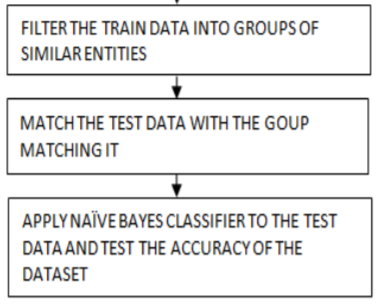

# K Nearest Neighbors model creation

In [ ]:
# Importing the necessary libraries
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# K Nearest Neighbors model creation
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = model_knn.predict(X_test)
model_knn.score(X_test,y_test)

0.7650429799426934

In [ ]:
# Printing Classification report for KNN model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

               precision    recall  f1-score   support

   automobile       0.77      0.98      0.86        47
entertainment       0.61      0.86      0.72        57
     politics       0.82      0.87      0.84        46
      science       0.93      0.98      0.96        58
       sports       0.93      0.55      0.69        49
   technology       0.61      0.31      0.41        36
        world       0.71      0.66      0.69        56

     accuracy                           0.77       349
    macro avg       0.77      0.74      0.74       349
 weighted avg       0.77      0.77      0.75       349



# Decision Tree model creation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy')

In [ ]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_dt = model_dt.predict(X_test)
model_dt.score(X_test,y_test)

0.8252148997134671

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_dt)
cm

array([[46,  0,  0,  0,  0,  1,  0],
       [ 0, 50,  0,  0,  3,  3,  1],
       [ 0,  2, 41,  0,  0,  2,  1],
       [ 0,  0,  0, 55,  2,  1,  0],
       [ 0, 11,  0,  0, 35,  0,  3],
       [ 1,  5,  0,  3,  0, 23,  4],
       [ 0, 11,  0,  0,  3,  4, 38]])

Text(66.5, 0.5, 'Actual')

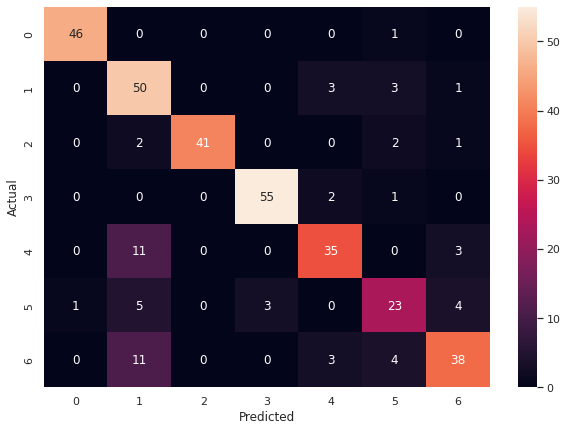

In [ ]:
plt.figure(figsize=(10,7)) 
sns.heatmap(cm, annot=True) 
plt.xlabel('Predicted') 
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test, y_pred_dt))

               precision    recall  f1-score   support

   automobile       0.98      0.98      0.98        47
entertainment       0.63      0.88      0.74        57
     politics       1.00      0.89      0.94        46
      science       0.95      0.95      0.95        58
       sports       0.81      0.71      0.76        49
   technology       0.68      0.64      0.66        36
        world       0.81      0.68      0.74        56

     accuracy                           0.83       349
    macro avg       0.84      0.82      0.82       349
 weighted avg       0.84      0.83      0.83       349



Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=40)
rf1.fit(X_train,y_train)
pred = rf1.predict(X_test)
print(classification_report(y_test, y_pred_dt))

               precision    recall  f1-score   support

   automobile       0.98      0.98      0.98        47
entertainment       0.63      0.88      0.74        57
     politics       1.00      0.89      0.94        46
      science       0.95      0.95      0.95        58
       sports       0.81      0.71      0.76        49
   technology       0.68      0.64      0.66        36
        world       0.81      0.68      0.74        56

     accuracy                           0.83       349
    macro avg       0.84      0.82      0.82       349
 weighted avg       0.84      0.83      0.83       349



#Here output is news category

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)


Enter a Text: bjp
['politics']


##Concluding the most efficient model

In [ ]:
outcome = []
model_names = []
models = [
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('RandomForest', RandomForestClassifier()),
          ('NaiveBayes', MultinomialNB())
          ]

In [ ]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=None)
    results = model_selection.cross_val_score(model, X_test, y_test, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

DecTree| Mean=0.644874 STD=0.071751
KNN| Mean=0.481513 STD=0.105026
RandomForest| Mean=0.653361 STD=0.087730
NaiveBayes| Mean=0.722101 STD=0.079689


From the models above, KNN has 68% accuracy, Decision Tree has 85% accuracy, Random Forest with 85% but where as Naive Bayes gives us 88.25% from which we can colude that Naive Bayes gives us more accurate predictions.

In [ ]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()